<a href="https://colab.research.google.com/github/NehaKumari500092077/Visual-Computing/blob/main/Assignment1_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Color Space Conversion (3 Marks)
Convert an image from YUV to YCbCr color space using the provided conversion matrices. Implement the conversion without using OpenCV library functions. Verify the result using OpenCV. Use a_1_task_1.png as input.

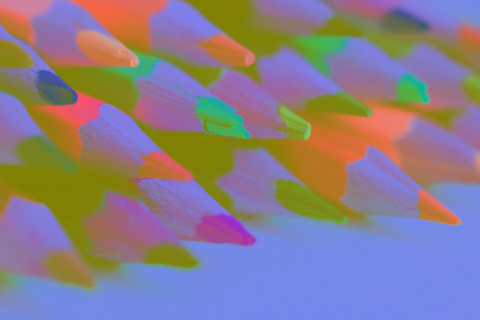

In [23]:
from PIL import Image
img = Image.open("/content/a_1_task_1.png")
display(img)

'YCbCr Image'

array([[[  2,   1, 252],
        [  2,   2, 250],
        [  2,   1, 251],
        ...,
        [ 25,  19, 219],
        [ 24,  19, 220],
        [ 24,  19, 220]],

       [[  2,   1, 252],
        [  2,   1, 251],
        [  2,   2, 250],
        ...,
        [ 24,  19, 220],
        [ 24,  19, 220],
        [ 24,  19, 220]],

       [[  2,   1, 251],
        [  2,   1, 252],
        [  2,   1, 251],
        ...,
        [ 24,  19, 220],
        [ 24,  19, 220],
        [ 24,  19, 220]],

       ...,

       [[ 25,  20, 218],
        [ 25,  20, 218],
        [ 25,  20, 218],
        ...,
        [ 22,  17, 223],
        [ 22,  17, 223],
        [ 22,  17, 223]],

       [[ 25,  20, 218],
        [ 25,  20, 218],
        [ 25,  20, 218],
        ...,
        [ 21,  17, 224],
        [ 21,  16, 225],
        [ 21,  17, 224]],

       [[ 25,  20, 218],
        [ 25,  20, 219],
        [ 25,  20, 218],
        ...,
        [ 21,  16, 225],
        [ 21,  16, 225],
        [ 21,  16, 225]]], dtype=uint8)
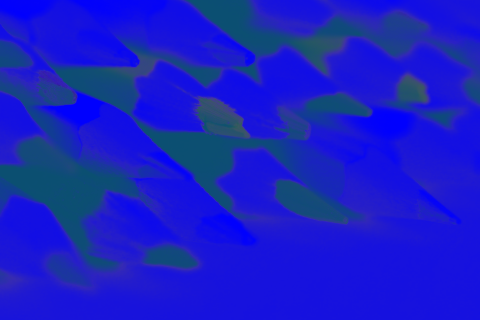

In [54]:
import numpy as np
from PIL import Image

# YUV to RGB conversion
def convert_yuv_to_rgb(input_img):
  conversion_matrix = np.array([[1.0, 0.0, 1.13983],
                                [1.0, -0.39465, 0.58060],
                                [1.0, 2.03211, 0.0]
                                ])

  # convert input image to numpy array
  input_img_array = np.array(input_img)

  # normalize it in the range of [0, 1]
  input_img_array = input_img_array / 255.0

  #reshape and transpose it
  input_img_array = input_img_array.reshape(-1, 3).T

  #matrix transformation
  rgb_img = np.dot(conversion_matrix, input_img_array)

  # clip values [0, 255] and reshaping into image formate
  rgb_img = np.clip(rgb_img * 255.0, 0, 255)

  rgb_img = rgb_img.astype(np.uint8).T

  rgb_img = rgb_img.reshape(input_img.size[1], input_img.size[0], 3)

  return Image.fromarray(rgb_img)


# RGB to YCbCr conversion
def convert_rgb_to_ycbcr(rgb_img):
  conversion_matrix = np.array([[0.299, 0.587, 0.114],
                                [-0.168736, -0.331264, 0.5],
                                [0.5, -0.418688, -0.081312]])

  # convert rg image into numpy array
  rgb_img_array = np.array(rgb_img)

  # normalize it in the range [0, 1]
  rgb_img_array = rgb_img_array / 255.0

  # reshape and transpose it
  rgb_img_array = rgb_img_array.reshape(-1, 3).T

  # matrix transformation
  ycbcr_img = np.dot(conversion_matrix, rgb_img_array)

  # clip values [0, 1], and reshaping into image format
  ycbcr_img = np.clip(ycbcr_img * 255.0, 0, 255)

  ycbcr_img = ycbcr_img.astype(np.uint8).T

  ycbcr_img = ycbcr_img.reshape(rgb_img.size[1], rgb_img.size[0], 3)

  return Image.fromarray(ycbcr_img)


# open input image
input_img = Image.open("/content/a_1_task_1.png")

#convert input image (YUV) to RGB
rgb_img = convert_yuv_to_rgb(input_img)

#convert RGB to YCbCr
ycbcr_img = convert_rgb_to_ycbcr(rgb_img)

# save image YCbCr Image
ycbcr_img.save('a_1_task_1_ouput.png')

# varify using openCv
import cv2 as cv
ycbcr_output_img = cv.imread("/content/a_1_task_1_ouput.png")
display("YCbCr Image", ycbcr_output_img)


